<a href="https://colab.research.google.com/github/yagnic/ml/blob/master/FBprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pystan fbprophet


In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [14]:
from fbprophet import Prophet
path="data.csv"

In [15]:
df=pd.read_csv(path,header=0)

In [16]:
df.head()

,OrderDate,Revenue
0,31-05-11 0:00,2024.994
1,31-05-11 0:00,6074.982
2,31-05-11 0:00,2024.994
3,31-05-11 0:00,2039.994
4,31-05-11 0:00,2039.994


In [17]:
df.dtypes

OrderDate     object
Revenue      float64
dtype: object

In [18]:
df["OrderDate"]=pd.to_datetime(df["OrderDate"])

In [19]:
df.dtypes

OrderDate    datetime64[ns]
Revenue             float64
dtype: object

In [20]:
df.head()

,OrderDate,Revenue
0,2011-05-31,2024.994
1,2011-05-31,6074.982
2,2011-05-31,2024.994
3,2011-05-31,2039.994
4,2011-05-31,2039.994


In [21]:
df.tail()

,OrderDate,Revenue
79212,2014-06-30,21.98
79213,2014-06-30,8.99
79214,2014-06-30,21.98
79215,2014-06-30,159.00
79216,2014-06-30,8.99


In [22]:
df.columns=['ds','y']

In [23]:
df

,ds,y
0,2011-05-31,2024.994
1,2011-05-31,6074.982
2,2011-05-31,2024.994
3,2011-05-31,2039.994
4,2011-05-31,2039.994
...,...,...
79212,2014-06-30,21.980
79213,2014-06-30,8.990
79214,2014-06-30,21.980
79215,2014-06-30,159.000


In [24]:
m=Prophet(interval_width=0.95,daily_seasonality=True)

In [25]:
model=m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [26]:
future=m.make_future_dataframe(periods=1825,freq='D')

In [28]:
forecast=m.predict(future)

In [29]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-01-06,3201.904272,-1309.224552,5487.123690,3201.904272,3201.904272,-1189.072212,-1189.072212,-1189.072212,-1499.325335,-1499.325335,-1499.325335,-8.702462,-8.702462,-8.702462,318.955585,318.955585,318.955585,0.0,0.0,0.0,2012.832060
1,2011-01-07,3203.191294,-1301.514194,5627.705631,3203.191294,3203.191294,-1159.057599,-1159.057599,-1159.057599,-1499.325335,-1499.325335,-1499.325335,23.850854,23.850854,23.850854,316.416882,316.416882,316.416882,0.0,0.0,0.0,2044.133696
2,2011-01-08,3204.478316,-1405.489857,5407.268656,3204.478316,3204.478316,-1303.153289,-1303.153289,-1303.153289,-1499.325335,-1499.325335,-1499.325335,-115.285491,-115.285491,-115.285491,311.457537,311.457537,311.457537,0.0,0.0,0.0,1901.325027
3,2011-01-10,3207.052360,-1351.628009,5457.480612,3207.052360,3207.052360,-1130.606371,-1130.606371,-1130.606371,-1499.325335,-1499.325335,-1499.325335,73.783403,73.783403,73.783403,294.935561,294.935561,294.935561,0.0,0.0,0.0,2076.445989
4,2011-01-11,3208.339383,-1589.103408,5322.570841,3208.339383,3208.339383,-1270.653762,-1270.653762,-1270.653762,-1499.325335,-1499.325335,-1499.325335,-55.124846,-55.124846,-55.124846,283.796419,283.796419,283.796419,0.0,0.0,0.0,1937.685620


In [30]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2885,2019-12-01,-1814.749432,-27945.180090,21794.590446,-25855.730619,23141.916383,-1357.802438,-1357.802438,-1357.802438,-1499.325335,-1499.325335,-1499.325335,-59.388687,-59.388687,-59.388687,200.911584,200.911584,200.911584,0.0,0.0,0.0,-3172.551870
2886,2019-12-02,-1816.592500,-27397.235008,22943.942530,-25882.096133,23154.737360,-1242.035670,-1242.035670,-1242.035670,-1499.325335,-1499.325335,-1499.325335,73.783403,73.783403,73.783403,183.506262,183.506262,183.506262,0.0,0.0,0.0,-3058.628171
2887,2019-12-03,-1818.435569,-27415.616639,21953.071324,-25908.209939,23167.558336,-1389.117719,-1389.117719,-1389.117719,-1499.325335,-1499.325335,-1499.325335,-55.124846,-55.124846,-55.124846,165.332462,165.332462,165.332462,0.0,0.0,0.0,-3207.553288
2888,2019-12-04,-1820.278637,-27917.274297,21850.304024,-25934.281265,23180.379313,-1211.663271,-1211.663271,-1211.663271,-1499.325335,-1499.325335,-1499.325335,140.867229,140.867229,140.867229,146.794835,146.794835,146.794835,0.0,0.0,0.0,-3031.941908
2889,2019-12-05,-1822.121705,-27727.513710,22086.420587,-25960.352591,23193.200289,-1379.716894,-1379.716894,-1379.716894,-1499.325335,-1499.325335,-1499.325335,-8.702462,-8.702462,-8.702462,128.310903,128.310903,128.310903,0.0,0.0,0.0,-3201.838599


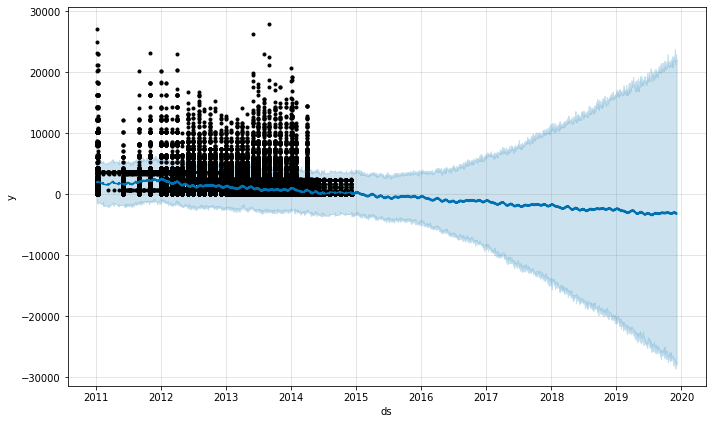

In [31]:
plot1=m.plot(forecast)

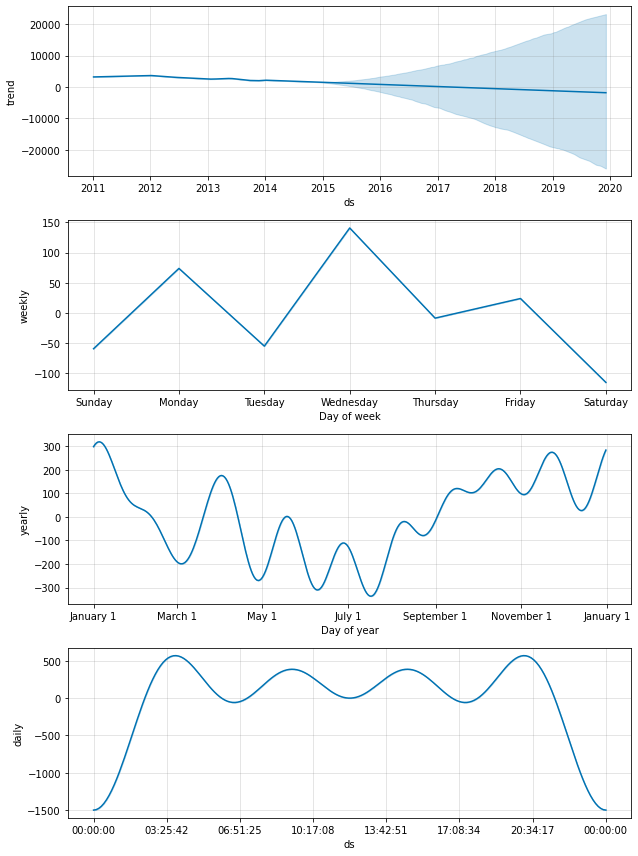

In [32]:
plot2=m.plot_components(forecast)